# Lectures at Morelia, Mexico


# Partial Differential Equations (PDEs)

\begin{equation}
A\frac{\partial^2 U(x,y)}{\partial x^2}+2B\frac{\partial^2 U(x,y)}{\partial x\partial y}+C\frac{\partial^2 U(x,y)}{\partial y^2}+D\frac{\partial U(x,y)}{\partial x}+E\frac{\partial U(x,y)}{\partial y}=F
\end{equation}

|*     Elliptic     * | *      Parabolic   * | *   Hyperbolic   * |
|----|----|----| 
|$d=AC-B^2>0$|$d=AC-B^2=0$|$d=AC-B^2<0$|
|$\nabla^2 U(x) = -4\pi\rho(x)$|$\nabla^2 U(\mathbf{x},t) =a \partial U/\partial t$|$\nabla^2 U(\mathbf{x},t)=c^{-2}\partial^2 U/\partial t^2\mbox{}$  |
| Poisson's | Heat | Wave|

Elliptic equation: second-order derivatives of all the variables, but having the same sign when placed on the same side  
Parabolic equation: a first-order derivative in one variable and a second-order derivative in the other  
Hyperbolic equation: equation: second-order derivatives of all the variables, but having the opposite signs when placed on the same side  

To uniquely determine the solution, needs special boundary/initial condition.

## Parabolic Equations

An alumnium bar of length L=1m. It is insulated along its length but not at its ends. Initially the bar is at a uniform temperature of 100 C and both ends are placed in contact with ice water at 0 C. Heat flows out of the noninsulated ends only. 

The heat flow at each radius is proportional to the gradient of the temperature T across the material:
\begin{equation}
H=-K\nabla T(x,t)
\end{equation}
Where K is the thermal conductivity of the material. The total amount of heat per unit length in the material is proportional to the temperature
\begin{equation}
Q(t)=\int dx C\rho(x)T(x,t)
\end{equation}
C is the specific heat of the material and $\rho$ is its density. Because energy is conserved, the rate of decrease in Q with time equal the amount of heat flowing out of the material
\begin{equation}
\frac{\partial T(x,t)}{\partial t}=\frac{K}{C\rho}\nabla^2 T
\end{equation}
Since there is no temperature variation in directions perpendicular to the bar (y and z), we have
\begin{equation}
\frac{\partial T(x,t)}{\partial t}=\frac{K}{C\rho}\frac{\partial^2 T(x,t)}{\partial x^2}
\end{equation}
With the boundary and initial condition
\begin{equation}
T(x,t=0)=100 C,\qquad, T(x=0,t)=T(x=L,t)=0
\end{equation}
K=210, C=900, $\rho$=2700.



## FTCS 


Notice that the statbility requires that 
\begin{equation}
\Delta t<\frac{1}{2}\frac{C\rho\Delta x^2}{K}
\end{equation}

In [ ]:
# if delta x=0.03, we have
print(0.5*900.*2700.*0.03*0.03/210)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


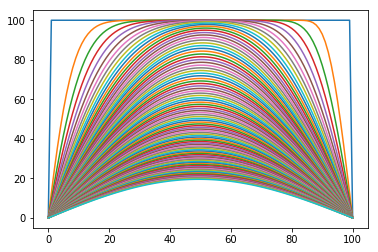

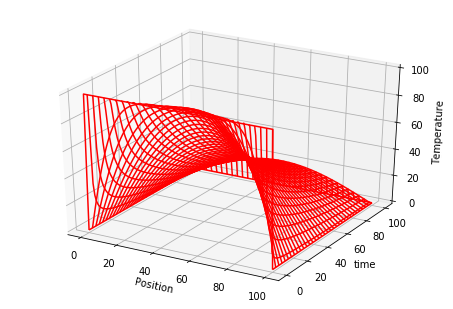

finished


In [6]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# EqHeat.py: solves heat equation via finite differences, 3-D plot
 
from numpy import *
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 

Nx = 101;       # grid number in the x direction
tend=10000.;    # the end of the integration
Dt=5.2;         # timestep size
Dtout=100.;     # every Dtout, output the T
Dx = 0.03;      # grid interval in the x direction                                                      
KAPPA = 210.; SPH = 900.; RHO = 2700. # Conductivity, specf heat, density                                                      
T = zeros(Nx,float);    # Temperature at each point 
Tn = zeros(Nx,float);    # Temperature at the new timestep at each point 
Tp = zeros((Nx,int(tend/Dtout)+1),float)  # store T along time too
                                    

for ix in range (1, Nx - 1):  T[ix] = 100.0;               # Initial T
T[0] = 0.0 ;                             # 1st & last T = 0
T[Nx-1] = 0. ; 
cons = KAPPA/(SPH*RHO)*Dt/(Dx*Dx);                             # constant

toutn=0
t=0.
while t < tend:                                  
    for ix in range (1, Nx - 1):                       
        Tn[ix] = T[ix] +  cons*(T[ix+1] + T[ix-1] - 2.*T[ix])    
    Tn=T
    if t >= toutn*Dtout: 
        p.plot(T)
        Tp[:,toutn] = T[:]   
        print(toutn)   
        toutn += 1                        
    t+=Dt
        
x = list(range(0, Nx))                       # Plot alternate pts
y = list(range(0, int(tend/Dtout)+1))                      
X, Y = p.meshgrid(x, y)                       

def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Tp)              
fig = p.figure()                                          # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Y, Z, color = 'r')                    
ax.set_xlabel('Position')                                     
ax.set_ylabel('time')
ax.set_zlabel('Temperature')
p.show()                               
print("finished")                               

## Crank-Nicolson Method

\begin{equation}
T_{j,n+1}-T_{j,n}=\frac{\eta}{2}[T_{j-1,n+1}-2T_{j,n+1}+T_{j+1,n+1}+T_{j-1,n}-2T_{j,n}+T_{j+1,n}]
\end{equation}
where $x=j\Delta x$, $t=n\Delta t$, $\eta=\frac{K\Delta t}{C\rho\Delta x^2}$. Then the equation becomes
\begin{equation}
-T_{j-1,n+1}+\left(\frac{2}{\eta}+2\right)T_{j,n+1}-T_{j+1,n+1}=T_{j-1,n}+\left(\frac{2}{\eta}-2\right)T_{j,n}+T_{j+1,n}
\end{equation}

We have
\begin{align} &\begin{pmatrix} 
\big(\frac{2}{\eta}+2\big) & -1 & & & & \\
 -1 &\big(\frac{2}{\eta}+2\big) & -1 & & & \\
 & -1 & \big(\frac{2}{\eta}+2\big) & -1 & & \\
 & & \ddots & \ddots & \ddots &  & \\
 & & & -1 &\big( \frac{2}{\eta}+2\big) &-1 &      \\
 & & & &-1& \big(\frac{2}{\eta}+2\big) \\
 \end{pmatrix}
\begin{pmatrix}
 T_{1,n+1}\\
 T_{2,n+1}\\
 T_{3,n+1}\\
 \vdots \\
 T_{N-2,n+1}\\
 T_{N-1,n+1}
 \end{pmatrix}     \\
 & \quad =\begin{pmatrix}
 T_{0,n+1}+T_{0,n}+\big(\frac{2}{\eta}-2\big)T_{1,n}+T_{2,n}\\
 T_{1,n}+\big(\frac{2}{\eta}-2\big)T_{2,n}+T_{3,n}\\
 T_{2,n}+\big(\frac{2}{\eta}-2\big)T_{3,n}+T_{4,n}\\
 \vdots \\
 T_{N-3,n}+\big(\frac{2}{\eta}-2\big)T_{N-2,n}+T_{N-1,n}\\
 T_{N-2,n}+\big(\frac{2}{\eta}-2\big)T_{N-1,n}+T_{N,n}+T_{N,n+1}
 \end{pmatrix}. \end{align}

### How to solve Tridiagonal Matrix Equation
\begin{equation}
\begin{pmatrix}
 d_1 & c_1 & 0   & 0    & \cdots & \cdots & \cdots  & 0 &\\
 a_2 & d_2 & c_2 & 0    & \cdots & \cdots & \cdots  & 0  &\\
 0 & a_3 & d_3   & c_3  &\cdots &\cdots  &\cdots   & 0 &\\
 \cdots & \cdots & \cdots   & \cdots    & \cdots & \cdots & \cdots  & \cdots
 &\\
 0 & 0 & 0   & 0    &\cdots  & a_{N-1}  & d_{N-1}    & c_{N-1}
 &\\
 0 & 0 & 0   & 0    & \cdots & 0    & a_{N}  & d_{N} &\\
 \end{pmatrix}
\begin{pmatrix}
 x_1\\
 x_2\\
 x_3\\
 \ddots \\
 x_{N-1}\\
 x_N
 \end{pmatrix} 
 =\begin{pmatrix}
 b_1\\
 b_2\\
 b_3\\
 \ddots \\
 b_{N-1}\\
 b_N
 \end{pmatrix}
 \end{equation}
 
 This can be reduced to
\begin{equation}
\begin{pmatrix}
1 & h_1 & 0 & 0 & \cdots & 0 &\\
 0 & 1 & h_2     & 0  & \cdots    & 0    &\\
 0 &  0 & 1 & h_3& \cdots    & 0 &\\
 0& \cdots & \cdots     & \ddots    & \ddots & \cdots &\\
 0 & 0 & 0   & 0    & \cdots & \cdots       &\\
 0 & 0 & 0   &   \cdots &    0 & 1 &
\end{pmatrix}
\begin{pmatrix}
 x_1\\
 x_2\\
 x_3\\
 \ddots \\
 \cdot \\
 x_N
 \end{pmatrix} =\begin{pmatrix}
 p_1\\
 p_2\\
 p_3\\
 \ddots \\
 \cdot \\
 p_N
 \end{pmatrix}
 \end{equation}
 
 where
\begin{equation}
h_i=\frac{c_i}{d_i-a_i h_{i-1}},\quad
p_i=\frac{b_i-a_ip_{i-1}}{d_i-a_i h_{i-1}}.
\end{equation}

Then we can go from the last $x_{n}$ to the first $x_{1}$
\begin{equation}
x_{n}=P_{n}-h_{n}x_{n+1}
\end{equation}

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


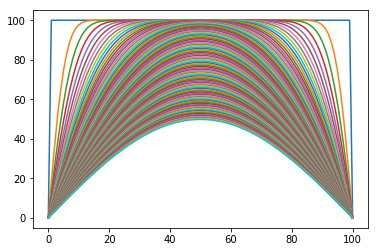

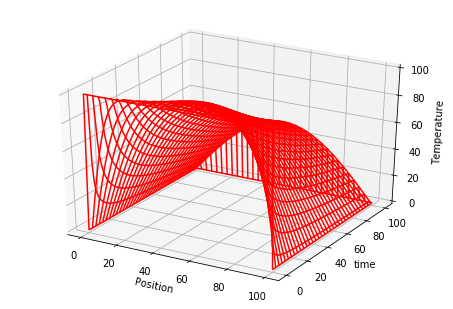

finished


In [2]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# HeatCNTridiag.py:  solution of heat eqtn via CN method	 

import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D ;
from numpy import *;
import numpy;

Nx=101;      tend=10000.; Dt=5.;  Dtout=100.; Nt = 3000;     Dx = 0.03;                                                            
KAPPA = 210.; SPH = 900.; RHO = 2700. # Conductivity, specf heat, density                                                      
T = zeros(Nx,float);  Tp = zeros((Nx,int(tend/Dtout)+1),float)  
                 

for ix in range (1, Nx - 1):  T[ix] = 100.0;               # Initial T
T[0] = 0.0                     # 1st & last T = 0
T[Nx-1] = 0. 
cons = KAPPA/(SPH*RHO)*Dt/(Dx*Dx);                             # constant
m = 1      

n   = 100;   m = 100
Ta  = zeros((Nx),float); Tb =zeros((Nx),float); Tc = zeros((Nx),float)
Td  = zeros((Nx),float); a = zeros((Nx),float); b = zeros((Nx),float)
c   = zeros((Nx),float); d = zeros((Nx),float); x = zeros((Nx),float)


def Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n):     
    Max = 101
    h = zeros( (Max), float )
    p = zeros( (Max), float )
    for i in range(1,n):
        a[i] = Ta[i]
        b[i] = Tb[i]
        c[i] = Tc[i]
        d[i] = Td[i]
    h[1] = c[1]/d[1]
    p[1] = b[1]/d[1]
    for i in range(2,n):
         h[i] = c[i] / (d[i]-a[i]*h[i-1])
         p[i] = (b[i] - a[i]*p[i-1]) / (d[i]-a[i]*h[i-1])
    x[n] = 0
    for i in range( n - 1, 0,-1 ): x[i] = p[i] - h[i]*x[i+1]



for i in range(1, n+1):  Td[i] = 2. + 2./cons
for i in range(1, n+1):  Ta[i] = -1.0;      Tc[i] = -1.0;     # Off diagonal

toutn=0
t=0.
while t < tend:     
    if t >= toutn*Dtout: 
        p.plot(T)
        Tp[:,toutn] = T[:]   
        print(toutn)   
        toutn += 1  
    for i in range(1,n): Tb[i] = T[i-1] + T[i+1] + (2./cons-2.) * T[i]
    Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n)            # Solve system
    for i in range(1, n+1):  T[i] = x[i]                                                                                 
    t+=Dt
 
x = list(range(0, Nx))                       # Plot alternate pts
y = list(range(0, int(tend/Dtout)+1))                      
X, Y = p.meshgrid(x, y)                       

def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Tp)              
fig = p.figure()                                          # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Y, Z, color = 'r')                    
ax.set_xlabel('Position')                                     
ax.set_ylabel('time')
ax.set_zlabel('Temperature')
p.show()                               
print("finished")     